In [61]:
!pip install pdfplumber pandas


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [76]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


# Importing the datasets

In [124]:
pdf_file_path = 'C:/Users/user/Downloads/MALIK_Loans_Database_Table.pdf'

with pdfplumber.open(pdf_file_path) as pdf:
    table_data = []
    for page in pdf.pages:
        tables = page.extract_tables()

        if tables:
            for table in tables:
                table_data.extend(table)

# Converting the table data into a DataFrame
pdf_df = pd.DataFrame(table_data[1:], columns=table_data[0])

In [125]:
pdf_df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0,141,360,1,1,Y


In [126]:
pdf_df.head(10)

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0,141,360,1,1,Y
5,1011,1,1,2,1,1,5417,4196,267,360,1,1,Y
6,1013,1,1,0,0,0,2333,1516,95,360,1,1,Y
7,1014,1,1,3,1,0,3036,2504,158,360,0,2,N
8,1018,1,1,2,1,0,4006,1526,168,360,1,1,Y
9,1020,1,1,1,1,0,12841,10968,349,360,1,2,N


#### How many rows and columns does the pdf database have?

In [127]:
num_rows, num_columns = pdf_df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 398
Number of columns: 13


#### Loading the Excel file

In [128]:
excel_file_path = 'C:/Users/user/Downloads/MALIK Loan Data.xlsx'
excel_df = pd.read_excel(excel_file_path)


excel_df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
2,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
3,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
4,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N


##### How many rows and columns are in the excel dataset?

In [129]:
num_rows, num_columns = excel_df.shape

print(f"rows: {num_rows}")
print(f"columns: {num_columns}")

rows: 249
columns: 13


##### Ensuring both datasets have the same column names

In [130]:
pdf_df.columns.tolist()


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Graduate',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [131]:
excel_df.columns.tolist()


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Graduate',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

##### Let's combine both datasets

In [132]:
Loan_Dataset = pd.concat([pdf_df, excel_df], ignore_index=True)
Loan_Dataset

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0,141,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
643,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
644,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y
645,2990,2,0,0,1,1,4583,0.0,133,333,0,2,N


In [133]:
# saving the combined dataset
Loan_Dataset.to_excel('Combined_Loan_dataset.xlsx', index=False)

# Exploratory Data Analysis

In [134]:
# Checking the shape of the dataset
Loan_Dataset.shape

(647, 13)

In [135]:
# Checking data types
print(Loan_Dataset.dtypes)

Loan_ID              object
Gender               object
Married              object
Dependents           object
Graduate             object
Self_Employed        object
ApplicantIncome      object
CoapplicantIncome    object
LoanAmount           object
Loan_Amount_Term     object
Credit_History       object
Property_Area        object
Loan_Status          object
dtype: object


In [136]:
# Checking for missing values
print(Loan_Dataset.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [137]:
# Summary statistics for numerical columns
Loan_Dataset.describe()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,647,647,647,647,647,647,647,647,647,647,647,647,647
unique,645,4,4,8,4,4,558,322,287,17,4,6,2
top,2990,1,1,0,1,0,2500,0,128,360,1,2,Y
freq,2,327,259,240,322,349,6,176,22,341,315,148,445


##### # In the summary Statistics and data types, the data type for the columns are not correct, so let's correct that


In [138]:
# Converting integer columns to appropriate data types
integer_columns = [
    'Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed',
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
    'Credit_History', 'Property_Area'
]

for col in integer_columns:
    Loan_Dataset[col] = pd.to_numeric(Loan_Dataset[col], errors='coerce').astype('int64')

# Converting Loan_Status to categorical
Loan_Dataset['Loan_Status'] = Loan_Dataset['Loan_Status'].astype('category')

# Printing the data types
print(Loan_Dataset.dtypes)

Loan_ID                 int64
Gender                  int64
Married                 int64
Dependents              int64
Graduate                int64
Self_Employed           int64
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount              int64
Loan_Amount_Term        int64
Credit_History          int64
Property_Area           int64
Loan_Status          category
dtype: object


In [139]:
# Summary statistics for numerical columns
Loan_Dataset.describe()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,1998.791345,1.187017,0.646059,0.729521,0.783617,0.131376,5362.117465,1606.160742,148.066461,334.831530,0.775889,1.961360
std,554.100025,0.390227,0.478561,1.001289,0.412097,0.338072,6012.965020,2863.263035,86.004699,63.109132,0.417318,0.788888
min,1002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,1563.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.500000,333.000000,1.000000,1.000000
50%,1963.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3814.000000,1229.000000,128.000000,360.000000,1.000000,2.000000
75%,2448.500000,1.000000,1.000000,1.000000,1.000000,0.000000,5717.000000,2304.000000,168.000000,360.000000,1.000000,3.000000
max,2990.000000,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000


In [140]:
# Checking for missing values again
print(Loan_Dataset.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [141]:
#checking unique values
columns = ['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for col in columns:
    print(f"\nUnique values in {col}:")
    print(Loan_Dataset[col].value_counts())


Unique values in Gender:
Gender
1    526
2    121
Name: count, dtype: int64

Unique values in Married:
Married
1    418
0    229
Name: count, dtype: int64

Unique values in Dependents:
Dependents
0    383
1    108
2    104
3     52
Name: count, dtype: int64

Unique values in Graduate:
Graduate
1    507
0    140
Name: count, dtype: int64

Unique values in Self_Employed:
Self_Employed
0    562
1     85
Name: count, dtype: int64

Unique values in Credit_History:
Credit_History
1    502
0    145
Name: count, dtype: int64

Unique values in Property_Area:
Property_Area
2    244
1    214
3    189
Name: count, dtype: int64

Unique values in Loan_Status:
Loan_Status
Y    445
N    202
Name: count, dtype: int64


##### Because it is not explanatory, Let's map the categorical values

In [142]:
# Mapping dictionaries for categorical columns
gender_map = {1: 'Male', 2: 'Female'}
married_map = {0: 'Single', 1: 'Married'}
dependents_map = {0: '0', 1: '1', 2: '2', 3: '3+'}
graduate_map = {0: 'Not Graduate', 1: 'Graduate'}
self_employed_map = {0: 'No', 1: 'Yes'}
credit_history_map = {0: 'No', 1: 'Yes'}
property_area_map = {1: 'Urban', 2: 'Semiurban', 3: 'Rural'}
loan_status_map = {'Y': 'Approved', 'N': 'Rejected'}

## Plots to understand data distribution

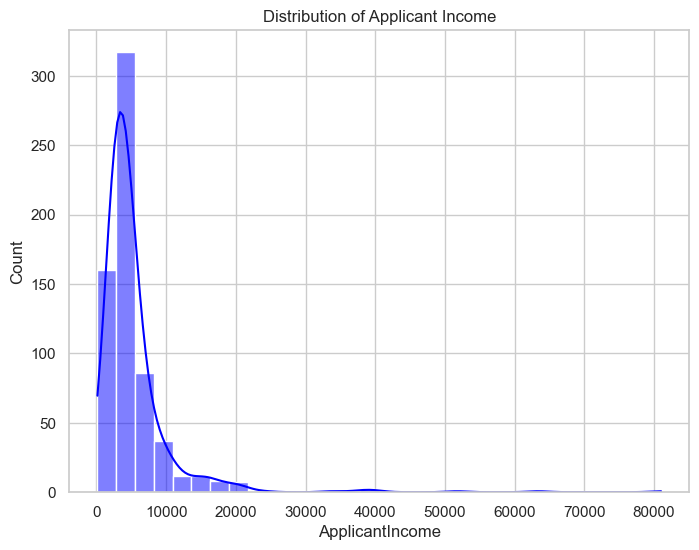

In [143]:
# Plotting the distribution of ApplicantIncome
plt.figure(figsize=(8, 6))
sns.histplot(Loan_Dataset['ApplicantIncome'], bins=30, kde=True, color='blue')
plt.title('Distribution of Applicant Income')
plt.show()



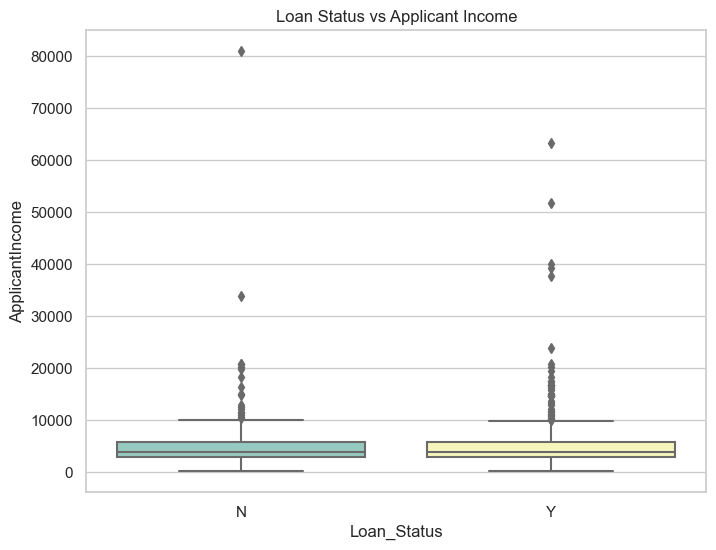

In [144]:
# Plotting the relationship between Loan_Status and ApplicantIncome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=Loan_Dataset, palette='Set3')
plt.title('Loan Status vs Applicant Income')
plt.show()

In [145]:
# Applying mappings to categorical columns
Loan_Dataset['Gender'] = Loan_Dataset['Gender'].map(gender_map)
Loan_Dataset['Married'] = Loan_Dataset['Married'].map(married_map)
Loan_Dataset['Dependents'] = Loan_Dataset['Dependents'].map(dependents_map)
Loan_Dataset['Graduate'] = Loan_Dataset['Graduate'].map(graduate_map)
Loan_Dataset['Self_Employed'] = Loan_Dataset['Self_Employed'].map(self_employed_map)
Loan_Dataset['Credit_History'] = Loan_Dataset['Credit_History'].map(credit_history_map)
Loan_Dataset['Property_Area'] = Loan_Dataset['Property_Area'].map(property_area_map)
Loan_Dataset['Loan_Status'] = Loan_Dataset['Loan_Status'].map(loan_status_map)

# Let's print the updated dataset
print(Loan_Dataset.head())

   Loan_ID Gender  Married Dependents      Graduate Self_Employed  \
0     1002   Male   Single          0      Graduate            No   
1     1003   Male  Married          1      Graduate            No   
2     1005   Male  Married          0      Graduate           Yes   
3     1006   Male  Married          0  Not Graduate            No   
4     1008   Male   Single          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0         128               360   
1             4583               1508         128               360   
2             3000                  0          66               360   
3             2583               2358         120               360   
4             6000                  0         141               360   

  Credit_History Property_Area Loan_Status  
0            Yes         Urban    Approved  
1            Yes         Rural    Rejected  
2            Yes       

#### Checking unique values for categorical columns

In [146]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(Loan_Dataset[col].value_counts())


Unique values in Gender:
Gender
Male      526
Female    121
Name: count, dtype: int64

Unique values in Married:
Married
Married    418
Single     229
Name: count, dtype: int64

Unique values in Dependents:
Dependents
0     383
1     108
2     104
3+     52
Name: count, dtype: int64

Unique values in Graduate:
Graduate
Graduate        507
Not Graduate    140
Name: count, dtype: int64

Unique values in Self_Employed:
Self_Employed
No     562
Yes     85
Name: count, dtype: int64

Unique values in Credit_History:
Credit_History
Yes    502
No     145
Name: count, dtype: int64

Unique values in Property_Area:
Property_Area
Semiurban    244
Urban        214
Rural        189
Name: count, dtype: int64

Unique values in Loan_Status:
Loan_Status
Approved    445
Rejected    202
Name: count, dtype: int64


In [147]:
# Checking the shape of the dataset
print("Shape of the dataset:", Loan_Dataset.shape)

# Check data types
print("\nData types:")
print(Loan_Dataset.dtypes)

# Check for missing values
print("\nMissing values:")
print(Loan_Dataset.isnull().sum())

Shape of the dataset: (647, 13)

Data types:
Loan_ID                 int64
Gender                 object
Married                object
Dependents             object
Graduate               object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome       int64
LoanAmount              int64
Loan_Amount_Term        int64
Credit_History         object
Property_Area          object
Loan_Status          category
dtype: object

Missing values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [148]:
# Summary statistics for numerical columns
print(Loan_Dataset.describe())

           Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count   647.000000       647.000000         647.000000  647.000000   
mean   1998.791345      5362.117465        1606.160742  148.066461   
std     554.100025      6012.965020        2863.263035   86.004699   
min    1002.000000       150.000000           0.000000    9.000000   
25%    1563.500000      2875.000000           0.000000  101.500000   
50%    1963.000000      3814.000000        1229.000000  128.000000   
75%    2448.500000      5717.000000        2304.000000  168.000000   
max    2990.000000     81000.000000       41667.000000  700.000000   

       Loan_Amount_Term  
count        647.000000  
mean         334.831530  
std           63.109132  
min           12.000000  
25%          333.000000  
50%          360.000000  
75%          360.000000  
max          480.000000  


In [149]:
# Checking for unique values for categorical columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(Loan_Dataset[col].value_counts())


Unique values in Gender:
Gender
Male      526
Female    121
Name: count, dtype: int64

Unique values in Married:
Married
Married    418
Single     229
Name: count, dtype: int64

Unique values in Dependents:
Dependents
0     383
1     108
2     104
3+     52
Name: count, dtype: int64

Unique values in Graduate:
Graduate
Graduate        507
Not Graduate    140
Name: count, dtype: int64

Unique values in Self_Employed:
Self_Employed
No     562
Yes     85
Name: count, dtype: int64

Unique values in Credit_History:
Credit_History
Yes    502
No     145
Name: count, dtype: int64

Unique values in Property_Area:
Property_Area
Semiurban    244
Urban        214
Rural        189
Name: count, dtype: int64

Unique values in Loan_Status:
Loan_Status
Approved    445
Rejected    202
Name: count, dtype: int64


# Visualization to understand the data distribution

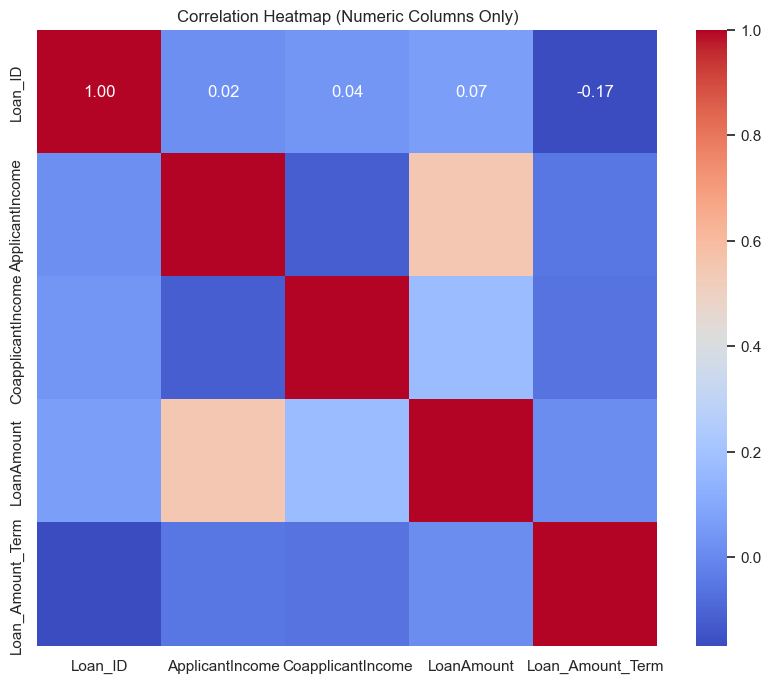

In [150]:
# Select only numeric columns for the correlation heatmap
numeric_columns = Loan_Dataset.select_dtypes(include=['int64', 'float64'])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

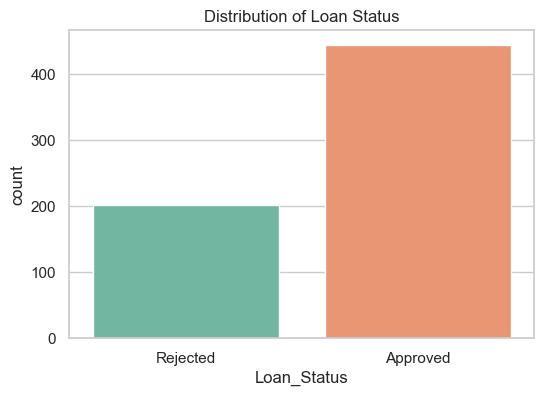

In [151]:
# Setting the style for plots
sns.set(style="whitegrid")

# Plotting the distribution of Loan_Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=Loan_Dataset, palette='Set2', hue_order=Loan_Dataset['Loan_Status'].unique())
plt.title('Distribution of Loan Status')
plt.show()


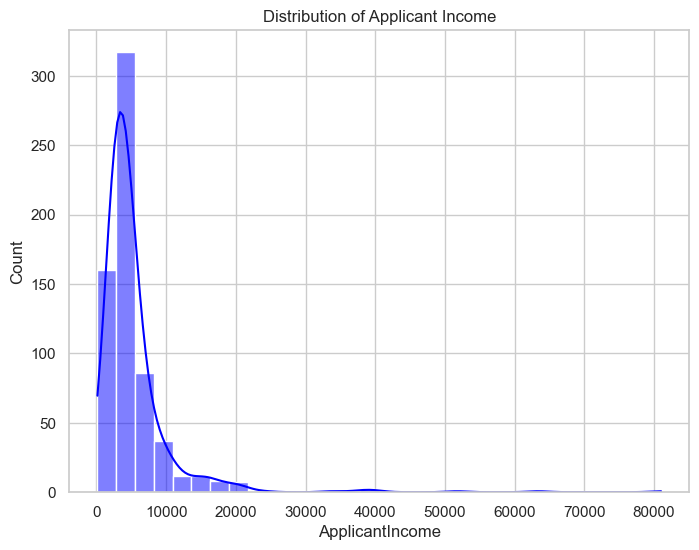

In [152]:
# Plotting the distribution of ApplicantIncome
plt.figure(figsize=(8, 6))
sns.histplot(Loan_Dataset['ApplicantIncome'], bins=30, kde=True, color='blue')
plt.title('Distribution of Applicant Income')
plt.show()

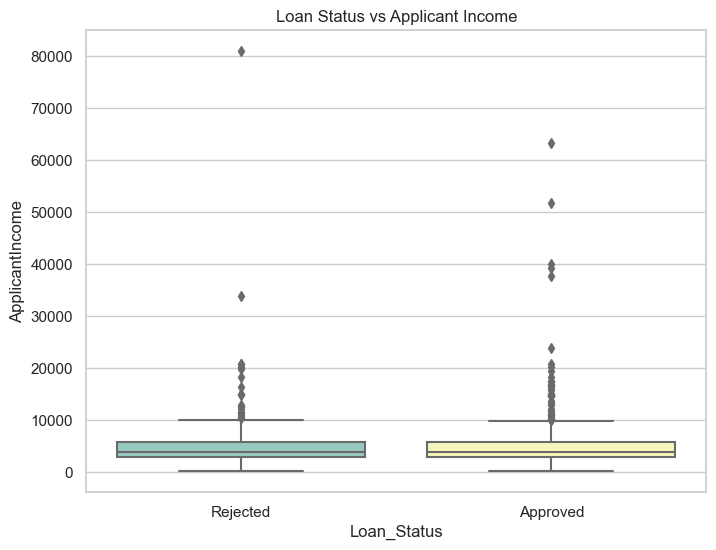

In [153]:
# Plot the relationship between Loan_Status and ApplicantIncome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=Loan_Dataset, palette='Set3')
plt.title('Loan Status vs Applicant Income')
plt.show()

# Data Analysis

#### 1. Loan Approval rate

In [154]:
# Calculate loan approval rate
loan_approval_rate = Loan_Dataset['Loan_Status'].value_counts(normalize=True) * 100

# Rounding to one decimal place and format as percentage
loan_approval_rate = loan_approval_rate.round(1).astype(str) + '%'

print("\nLoan Approval Rate:")
print(loan_approval_rate)



Loan Approval Rate:
Loan_Status
Approved    68.8%
Rejected    31.2%
Name: proportion, dtype: object


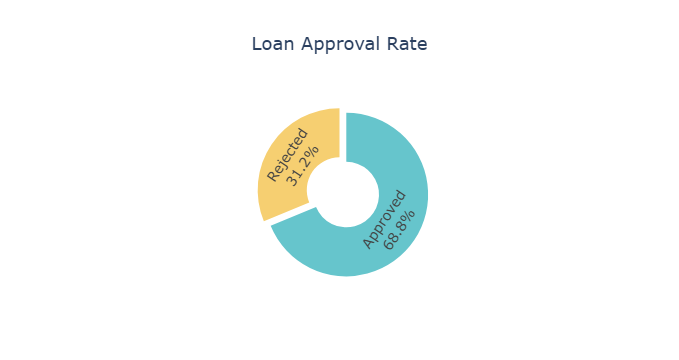

In [155]:
import plotly.express as px

# Calculating loan approval rate
loan_approval_rate = Loan_Dataset['Loan_Status'].value_counts(normalize=True) * 100

# Creating an interactive pie chart
fig = px.pie(values=loan_approval_rate.values, names=loan_approval_rate.index, 
             title='Loan Approval Rate', 
             color=loan_approval_rate.index, 
             color_discrete_sequence=px.colors.qualitative.Pastel,
             hole=0.4)  

# Updating layout for better styling
fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.1, 0]) 
fig.update_layout(font_size=14, title_font_size=18, title_x=0.5, showlegend=False)


fig.show()

#### 2. Impact of Credit History on Loan ApprovalLet's analyze how credit history affects loan approval.

In [156]:
# Groupping by Credit_History and Loan_Status
credit_history_impact = Loan_Dataset.groupby(['Credit_History', 'Loan_Status']).size().unstack()

# Calculating the percentage of approvals for each credit history category
credit_history_impact['Approval_Rate'] = (credit_history_impact['Approved'] / (credit_history_impact['Approved'] + credit_history_impact['Rejected'])) * 100

# Calculating the percentage of total loans for each credit history category
credit_history_impact['Total_Percentage'] = ((credit_history_impact['Approved'] + credit_history_impact['Rejected']) / (credit_history_impact['Approved'].sum() + credit_history_impact['Rejected'].sum())) * 100

# Round to one decimal point and add percentage sign
credit_history_impact['Approval_Rate'] = credit_history_impact['Approval_Rate'].round(1).astype(str) + '%'
credit_history_impact['Total_Percentage'] = credit_history_impact['Total_Percentage'].round(1).astype(str) + '%'

print("\nImpact of Credit History on Loan Approval:")
print(credit_history_impact)


Impact of Credit History on Loan Approval:
Loan_Status     Rejected  Approved Approval_Rate Total_Percentage
Credit_History                                                   
No                   100        45         31.0%            22.4%
Yes                  102       400         79.7%            77.6%


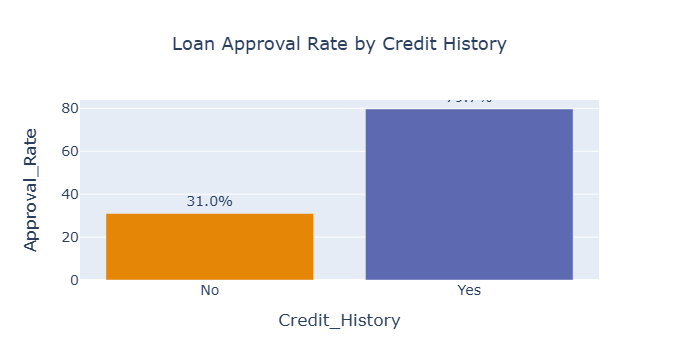

In [157]:
# Ensuring Approval_Rate is numeric 
if credit_history_impact['Approval_Rate'].dtype == 'object':  
    credit_history_impact['Approval_Rate'] = credit_history_impact['Approval_Rate'].str.rstrip('%').astype(float)
else:
    credit_history_impact['Approval_Rate'] = credit_history_impact['Approval_Rate'].astype(float)

# Create an interactive bar chart with bright colors
fig = px.bar(credit_history_impact, x=credit_history_impact.index, y='Approval_Rate', 
             title='Loan Approval Rate by Credit History', 
             labels={'x': 'Credit History', 'y': 'Approval Rate (%)'},
             text=credit_history_impact['Approval_Rate'].round(1).astype(str) + '%', 
             color=credit_history_impact.index, 
             color_discrete_sequence=px.colors.qualitative.Vivid)  

# Update layout for better styling
fig.update_traces(textposition='outside') 
fig.update_layout(font_size=14, title_font_size=18, title_x=0.5, showlegend=False)

fig.show()

#### 3. Impact of Income on Loan Approval
Let's analyze how applicant income affects loan approval.

In [158]:
# Create bins for ApplicantIncome
Loan_Dataset['Income_Bins'] = pd.cut(Loan_Dataset['ApplicantIncome'], bins=[0, 3000, 6000, 9000, 12000, 15000, 18000, 21000])

# Group by Income_Bins and Loan_Status
income_impact = Loan_Dataset.groupby(['Income_Bins', 'Loan_Status']).size().unstack()

# Calculate the percentage of approvals for each income bin
income_impact['Approval_Rate'] = (income_impact['Approved'] / (income_impact['Approved'] + income_impact['Rejected'])) * 100

# Calculate the percentage of total loans for each income bin
income_impact['Total_Percentage'] = ((income_impact['Approved'] + income_impact['Rejected']) / (income_impact['Approved'].sum() + income_impact['Rejected'].sum())) * 100

# Round to one decimal point and add percentage sign
income_impact['Approval_Rate'] = income_impact['Approval_Rate'].round(1).astype(str) + '%'
income_impact['Total_Percentage'] = income_impact['Total_Percentage'].round(1).astype(str) + '%'

print("\nImpact of Income on Loan Approval:")
print(income_impact)


Impact of Income on Loan Approval:
Loan_Status     Rejected  Approved Approval_Rate Total_Percentage
Income_Bins                                                      
(0, 3000]             58       129         69.0%            29.3%
(3000, 6000]          97       222         69.6%            49.9%
(6000, 9000]          25        44         63.8%            10.8%
(9000, 12000]         10        23         69.7%             5.2%
(12000, 15000]         4         9         69.2%             2.0%
(15000, 18000]         1         8         88.9%             1.4%
(18000, 21000]         5         4         44.4%             1.4%


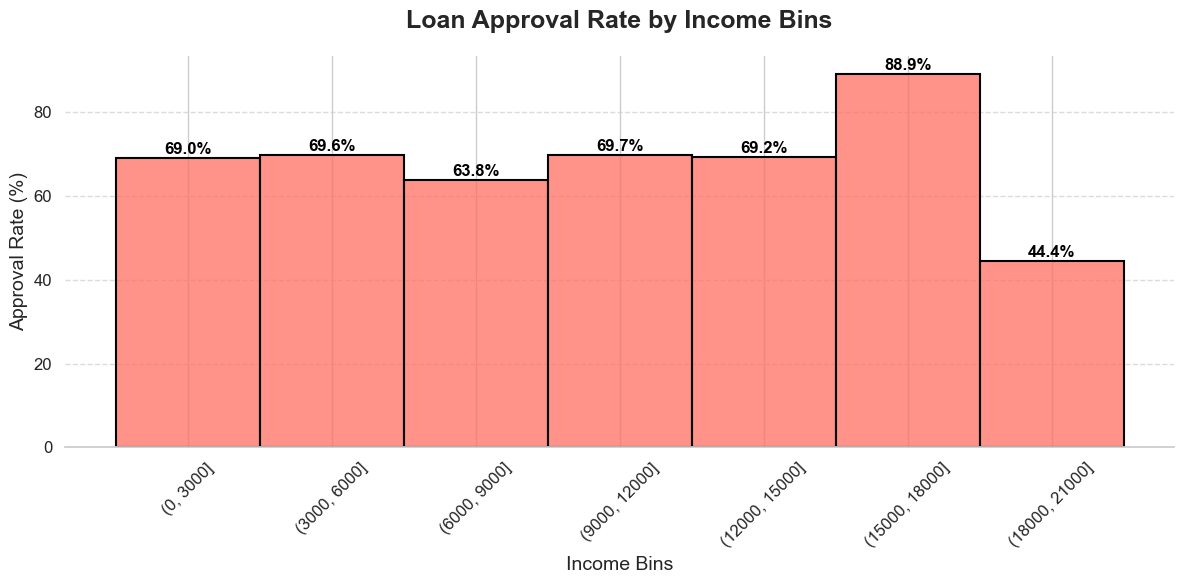

In [159]:
# Creating bins for ApplicantIncome
Loan_Dataset['Income_Bins'] = pd.cut(Loan_Dataset['ApplicantIncome'], bins=[0, 3000, 6000, 9000, 12000, 15000, 18000, 21000])
income_impact = Loan_Dataset.groupby(['Income_Bins', 'Loan_Status']).size().unstack()
income_impact['Approval_Rate'] = (income_impact['Approved'] / (income_impact['Approved'] + income_impact['Rejected'])) * 100

income_impact['Total_Percentage'] = ((income_impact['Approved'] + income_impact['Rejected']) / (income_impact['Approved'].sum() + income_impact['Rejected'].sum())) * 100

# Rounding to one decimal point and adding percentage sign
income_impact['Approval_Rate'] = income_impact['Approval_Rate'].round(1).astype(str) + '%'
income_impact['Total_Percentage'] = income_impact['Total_Percentage'].round(1).astype(str) + '%'

# Dropping rows with NaN values in Approval_Rate to avoid warnings
income_impact_clean = income_impact.dropna(subset=['Approval_Rate'])

# Histogram Visualization
plt.figure(figsize=(12, 6))
sns.histplot(
    x=income_impact_clean.index.astype(str),  
    weights=income_impact_clean['Approval_Rate'].str.rstrip('%').astype(float),  
    bins=len(income_impact_clean),  
    kde=False,  
    color='#FF6F61', 
    edgecolor='black',  
    linewidth=1.5,  
)

plt.title('Loan Approval Rate by Income Bins', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Income Bins', fontsize=14)
plt.ylabel('Approval Rate (%)', fontsize=14)

for i, value in enumerate(income_impact_clean['Approval_Rate'].str.rstrip('%').astype(float)):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12, fontweight='bold', color='black')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

#### 4. Impact of Property Area on Loan Approval
Analyinge how property area affects loan approval.

In [160]:
# Groupping by Property_Area and Loan_Status
property_area_impact = Loan_Dataset.groupby(['Property_Area', 'Loan_Status']).size().unstack()

# Calculating the percentage of approvals for each property area
property_area_impact['Approval_Rate'] = (property_area_impact['Approved'] / (property_area_impact['Approved'] + property_area_impact['Rejected'])) * 100

# Calculating the percentage of total loans for each property area
property_area_impact['Total_Percentage'] = ((property_area_impact['Approved'] + property_area_impact['Rejected']) / (property_area_impact['Approved'].sum() + property_area_impact['Rejected'].sum())) * 100

# Rounding to one decimal point and add percentage sign
property_area_impact['Approval_Rate'] = property_area_impact['Approval_Rate'].round(1).astype(str) + '%'
property_area_impact['Total_Percentage'] = property_area_impact['Total_Percentage'].round(1).astype(str) + '%'

print("\nImpact of Property Area on Loan Approval:")
print(property_area_impact)


Impact of Property Area on Loan Approval:
Loan_Status    Rejected  Approved Approval_Rate Total_Percentage
Property_Area                                                   
Rural                71       118         62.4%            29.2%
Semiurban            57       187         76.6%            37.7%
Urban                74       140         65.4%            33.1%


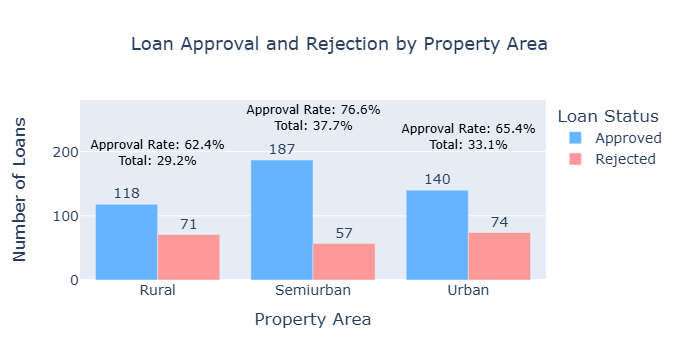

<Figure size 640x480 with 0 Axes>

In [161]:
# Groupping by Property_Area and Loan_Status
property_area_impact = Loan_Dataset.groupby(['Property_Area', 'Loan_Status']).size().unstack()

# Calculating the percentage of approvals for each property area
property_area_impact['Approval_Rate'] = (property_area_impact['Approved'] / (property_area_impact['Approved'] + property_area_impact['Rejected'])) * 100

# Calculating the percentage of total loans for each property area
property_area_impact['Total_Percentage'] = ((property_area_impact['Approved'] + property_area_impact['Rejected']) / (property_area_impact['Approved'].sum() + property_area_impact['Rejected'].sum())) * 100

# Rounding to one decimal point and add percentage sign
property_area_impact['Approval_Rate'] = property_area_impact['Approval_Rate'].round(1).astype(str) + '%'
property_area_impact['Total_Percentage'] = property_area_impact['Total_Percentage'].round(1).astype(str) + '%'

# Melting the DataFrame for Plotly
property_area_melted = property_area_impact.reset_index().melt(id_vars=['Property_Area'], value_vars=['Approved', 'Rejected'], 
                                                              var_name='Loan_Status', value_name='Count')

# Creating a grouped bar chart
fig = px.bar(property_area_melted, x='Property_Area', y='Count', color='Loan_Status', 
             barmode='group', text='Count',
             title='Loan Approval and Rejection by Property Area',
             labels={'Property_Area': 'Property Area', 'Count': 'Number of Loans'},
             color_discrete_sequence=['#66b3ff', '#ff9999'])  

# Updating layout for better styling
fig.update_traces(textposition='outside') 

# Adding approval rate and total percentage as annotations
for i, row in property_area_impact.iterrows():
    fig.add_annotation(
        x=i,  
        y=row['Approved'] + row['Rejected'] + 10,  
        text=f"Approval Rate: {row['Approval_Rate']}<br>Total: {row['Total_Percentage']}",
        showarrow=False,
        font=dict(size=12, color='black'),
        xanchor='center', 
    )

# Update layout for better styling
fig.update_layout(
    font_size=14,
    title_font_size=18,
    title_x=0.5,  # Center the title
    xaxis_title='Property Area',
    yaxis_title='Number of Loans',
    legend_title='Loan Status',
    hovermode='x unified', 
)
plt.savefig('Loan Approval and Rejection by Property Area.png')
fig.show()

<Figure size 1000x600 with 0 Axes>

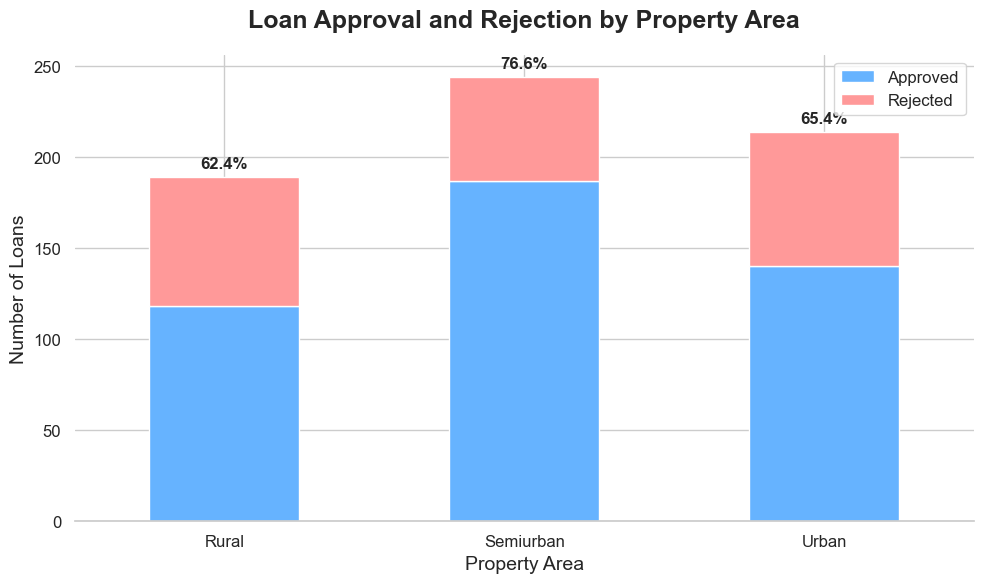

In [162]:
# Groupping by Property_Area and Loan_Status
property_area_impact = Loan_Dataset.groupby(['Property_Area', 'Loan_Status']).size().unstack()

property_area_impact['Approval_Rate'] = (property_area_impact['Approved'] / (property_area_impact['Approved'] + property_area_impact['Rejected'])) * 100

property_area_impact['Total_Percentage'] = ((property_area_impact['Approved'] + property_area_impact['Rejected']) / (property_area_impact['Approved'].sum() + property_area_impact['Rejected'].sum())) * 100

property_area_impact['Approval_Rate'] = property_area_impact['Approval_Rate'].round(1).astype(str) + '%'
property_area_impact['Total_Percentage'] = property_area_impact['Total_Percentage'].round(1).astype(str) + '%'

plt.figure(figsize=(10, 6))
property_area_impact[['Approved', 'Rejected']].plot(kind='bar', stacked=True, color=['#66b3ff', '#ff9999'], figsize=(10, 6))

plt.title('Loan Approval and Rejection by Property Area', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Property Area', fontsize=14)
plt.ylabel('Number of Loans', fontsize=14)

for i, (approved, rejected) in enumerate(zip(property_area_impact['Approved'], property_area_impact['Rejected'])):
    total = approved + rejected
    plt.text(i, total + 5, f'{property_area_impact["Approval_Rate"][i]}', ha='center', fontsize=12, fontweight='bold')

# Customizing the plot
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
sns.despine(left=True) 
plt.tight_layout()
plt.savefig('Loan Approval and Rejection by Property Area_2.png')
plt.show()

# Feature Engineering

In [163]:
print(Loan_Dataset.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bins'],
      dtype='object')


In [164]:
Loan_Dataset.drop(columns=['Income_Bins'], inplace=True)

In [165]:
print(Loan_Dataset["Loan_Status"].unique())

['Approved', 'Rejected']
Categories (2, object): ['Rejected', 'Approved']


In [166]:
# Create Debt-to-Income Ratio
Loan_Dataset['Debt_to_Income_Ratio'] = Loan_Dataset['LoanAmount'] / Loan_Dataset['ApplicantIncome']

# One-hot encode categorical variables
Loan_Dataset = pd.get_dummies(Loan_Dataset, columns=['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed', 'Credit_History', 'Property_Area'], drop_first=True)

# Drop unnecessary columns (e.g., Loan_ID)
Loan_Dataset.drop(columns=['Loan_ID'], inplace=True)

# Handle missing values separately for numerical and categorical columns
# Fill numerical columns with median
numerical_cols = Loan_Dataset.select_dtypes(include=['int64', 'float64']).columns
Loan_Dataset[numerical_cols] = Loan_Dataset[numerical_cols].fillna(Loan_Dataset[numerical_cols].median())

# Fill categorical columns with mode (most frequent value)
categorical_cols = Loan_Dataset.select_dtypes(include=['object', 'category']).columns
Loan_Dataset[categorical_cols] = Loan_Dataset[categorical_cols].fillna(Loan_Dataset[categorical_cols].mode().iloc[0])

# Split into features (X) and target (y)
X = Loan_Dataset.drop(columns=['Loan_Status'])  # Features
y = Loan_Dataset['Loan_Status'].map({'Approved': 1, 'Rejected': 0})  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Verify that the target variable has no NaN values
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())

Training set shape: (517, 15)
Testing set shape: (130, 15)
Unique values in y_train: [1, 0]
Categories (2, int64): [0, 1]
Unique values in y_test: [1, 0]
Categories (2, int64): [0, 1]


# Data Processing

In [167]:
print(Loan_Dataset.dtypes)

ApplicantIncome               int64
CoapplicantIncome             int64
LoanAmount                    int64
Loan_Amount_Term              int64
Loan_Status                category
Debt_to_Income_Ratio        float64
Gender_Male                    bool
Married_Single                 bool
Dependents_1                   bool
Dependents_2                   bool
Dependents_3+                  bool
Graduate_Not Graduate          bool
Self_Employed_Yes              bool
Credit_History_Yes             bool
Property_Area_Semiurban        bool
Property_Area_Urban            bool
dtype: object


In [168]:
print(Loan_Dataset["Property_Area_Urban"].unique())

[ True False]


# Model Building

In [169]:
# Scale the data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Increased max_iter
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Train and evaluate models
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    print(f"Training {name}...")
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)  # Use scaled data for Logistic Regression
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # Use unscaled data for other models
        y_pred = model.predict(X_test)
    print(f"Accuracy of {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Training Logistic Regression...
Accuracy of Logistic Regression: 0.7692
              precision    recall  f1-score   support

           0       0.84      0.45      0.58        47
           1       0.75      0.95      0.84        83

    accuracy                           0.77       130
   macro avg       0.80      0.70      0.71       130
weighted avg       0.78      0.77      0.75       130

[[21 26]
 [ 4 79]]


Training Random Forest...
Accuracy of Random Forest: 0.7077
              precision    recall  f1-score   support

           0       0.70      0.34      0.46        47
           1       0.71      0.92      0.80        83

    accuracy                           0.71       130
   macro avg       0.70      0.63      0.63       130
weighted avg       0.70      0.71      0.68       130

[[16 31]
 [ 7 76]]


Training XGBoost...
Accuracy of XGBoost: 0.7000
              precision    recall  f1-score   support

           0       0.62      0.45      0.52        47
           1   

# Confusion Matrix Visualizations

In [174]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

for name, model in models.items():
    print(f"Training {name}...")
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    print(f"Accuracy of {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix - {name}', filename=f'confusion_matrix_{name}.png')

Training Logistic Regression...
Accuracy of Logistic Regression: 0.7692
              precision    recall  f1-score   support

           0       0.84      0.45      0.58        47
           1       0.75      0.95      0.84        83

    accuracy                           0.77       130
   macro avg       0.80      0.70      0.71       130
weighted avg       0.78      0.77      0.75       130



TypeError: plot_confusion_matrix() got an unexpected keyword argument 'filename'

# Feature Importance

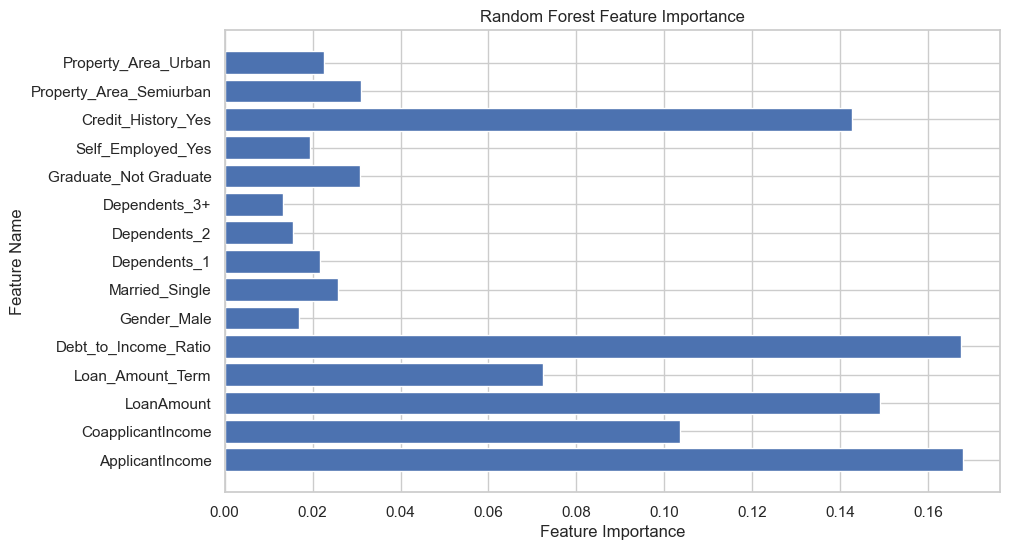

In [172]:
# Feature importance for Random Forest
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importance")
plt.show()

# Saving the best Model

In [173]:
import joblib

# Saving the best model (e.g., XGBoost)
joblib.dump(xgb, 'best_loan_approval_model.pkl')

['best_loan_approval_model.pkl']